number of grid points =  2511
grid size is approximately -44.46372394507142


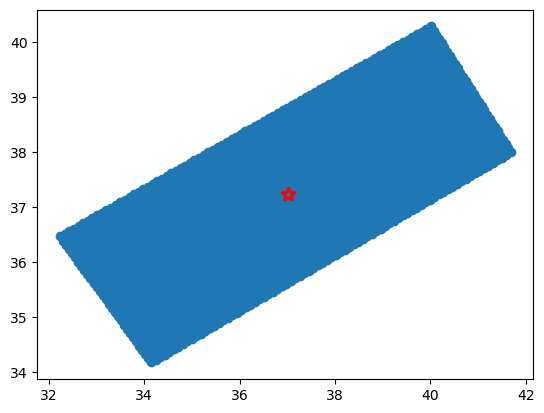

In [59]:
import numpy as np
import matplotlib.pyplot as plt

#this function gives the coordinates of each grid point at variable x and y extends. 
#make the functions "strike_coords" and "strike_coords_list" into one function. then make the functions "strikstrike_coords_grid_list" and "makemake_source_grid_along_strike" into a single function as well, so that the output is the same.

latitudes=[] 
longitudes=[]

strike = 58
event_lat= 37.2251
event_long=37.0209
x_extend=400 
y_extend=150

grid_size_km=10 #this is km spacing, each point will be placed these many kilometers away from the previous grid point
def strike_coords(strike, event_lat, event_long,extend):
    y_dist=extend * (np.cos(np.deg2rad(strike)))
    new_lat= event_lat + (y_dist/111.1)
    x_dist=extend * (np.sin(np.deg2rad(strike)))
   # denom=111.32
    denom = 111.32 * np.cos(np.deg2rad(event_lat))
    if np.abs(denom) < 1e-2:
        new_long = event_long  # No reliable longitude change, would result in unsuitable values
    else:
        new_long = event_long + (x_dist / denom)
    
    return new_lat, new_long
def eqspaced_points_list(strike, event_lat, event_long, extend, grid_size):
    lat_long_list=[]
    spacing=np.arange(grid_size,extend+grid_size, grid_size)
    
    for i in spacing:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, -i))
    lat_long_list.append(strike_coords(strike, event_lat, event_long, 0))
    for j in spacing:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, j))
    
    return lat_long_list


def make_source_grid_along_strike(strike, event_lat, event_long, x_extend, y_extend, grid_size_km_spacing):

    '''The main differences in this function from the previous make_source_grid_hetero are
    1)This function orients the source grid along the strike direction
    2)This function has its x and y extends in Kms, rather than in degrees. although 
    there can be a 
    3)The grid points are placed in equivalent extends, which are given in kilometers. 
    modification made so that we can input in degrees rather than in kilometers
    '''
    
    grid_list=[]
    temp=[]
    strike_perpendicular = (strike + 90) % 360
    strike_perpendicular_list=eqspaced_points_list(strike_perpendicular, event_lat, event_long, y_extend, grid_size_km_spacing)
    for i in strike_perpendicular_list:
        temp=eqspaced_points_list(strike, i[0], i[1], x_extend, grid_size_km_spacing)
        grid_list.append(temp)
        temp=[]
    
    
    #for i in strike_perpendicular_list:
    #   temp=strike_coords_list(strike, i[0], i[1], x_extend, grid_size_km_spacing)
    #    grid_list.append(temp)
    #    temp=[]
    slat=[]
    slong=[]
    slat = [coord[0] for row in grid_list for coord in row]
    slong= [coord[1] for row in grid_list for coord in row]
    return slong, slat
    
longitudes, latitudes = make_source_grid_along_strike(strike, event_lat, event_long, x_extend, y_extend, grid_size_km)
print("number of grid points = ", len(latitudes))
gridlen=111.1*(latitudes[1]-latitudes[0])/(np.cos(strike))
print("grid size is approximately", gridlen)
plt.scatter(longitudes, latitudes)
plt.plot(event_long, event_lat, marker='*',markersize=10,markeredgecolor='red',markeredgewidth=2)
plt.show()



In [36]:
spacing=np.arange(0,600 +(10), 10)
neg_spacing=-spacing
neg_spacing

array([   0,  -10,  -20,  -30,  -40,  -50,  -60,  -70,  -80,  -90, -100,
       -110, -120, -130, -140, -150, -160, -170, -180, -190, -200, -210,
       -220, -230, -240, -250, -260, -270, -280, -290, -300, -310, -320,
       -330, -340, -350, -360, -370, -380, -390, -400, -410, -420, -430,
       -440, -450, -460, -470, -480, -490, -500, -510, -520, -530, -540,
       -550, -560, -570, -580, -590, -600])

number of grid points =  4800


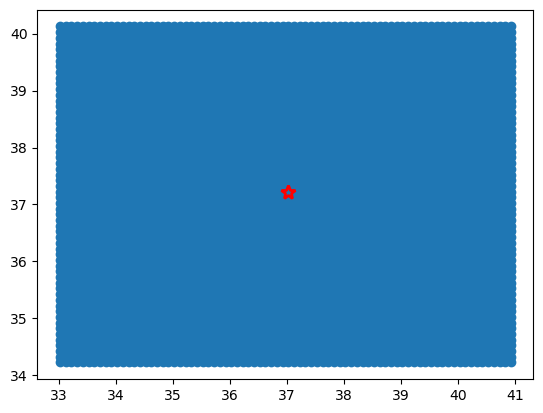

In [60]:
def make_source_grid_hetero(event_long,event_lat,source_grid_extend_x,
                            source_grid_extend_y,source_grid_size):
    '''
    This function makes potential source grid around the epicentre in a area
    defined by a variable source_grid_extend in x and y directions, discretized at a constant
    source_grid_size
    Retunrs   slat ,slong

    '''
    x=np.arange(event_long-source_grid_extend_x,event_long+source_grid_extend_x,source_grid_size)
    y=np.arange(event_lat-source_grid_extend_y,event_lat+source_grid_extend_y,source_grid_size)
    slat = []
    slong = []
    for i in range(np.size(x)):
        for j in range(np.size(y)):
            slong.append(x[i])
            slat.append(y[j])
    return slong,slat

a,b= make_source_grid_hetero(event_long, event_lat, 4, 3, 0.1)
print("number of grid points = ", len(a))

plt.scatter(a, b)
plt.plot(event_long, event_lat, marker='*',markersize=10,markeredgecolor='red',markeredgewidth=2)
plt.show()

